In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('mode.chained_assignment',  None)

In [2]:
os.getcwd()

'g:\\내 드라이브\\Raw데이터(kaggle)\\Climate Data Daily IDN'

In [2]:
cm = pd.read_csv("climate_data.csv")

In [252]:
cm.head(5)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [3]:
cm['date'] = cm['date'].str[6:] + "-" + cm['date'].str[3:5] + "-"+ cm['date'].str[0:2]

In [6]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB


In [4]:
cm['date'] = pd.to_datetime(cm['date'])

In [8]:
cm.tail(5)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980
589264,2020-12-31,24.3,32.0,26.7,86.0,26.6,5.8,7.0,350.0,2.0,C,97980


In [9]:
cm['ddd_car'].unique()

array(['E ', 'SW', nan, 'NE', 'W ', 'N ', 'NW', 'S ', 'SE', 'C '],
      dtype=object)

In [255]:
cm[cm['date'] == '2020-06-06']

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
3704,2020-06-06,NaN,30.4,27.3,78.0,0.0,1.5,10.0,290.0,5.0,W,96001
7700,2020-06-06,23.4,31.4,26.9,88.0,0.7,8.7,5.0,130.0,2.0,SE,96009
11423,2020-06-06,NaN,33.4,27.5,78.0,NaN,NaN,8.0,280.0,3.0,W,96011
15414,2020-06-06,23.3,32.5,27.1,83.0,0.0,5.6,3.0,190.0,1.0,NE,96015
19399,2020-06-06,22.6,32.2,27.2,80.0,17.4,4.5,3.0,130.0,1.0,C,96017
...,...,...,...,...,...,...,...,...,...,...,...,...
575532,2020-06-06,23.5,32.2,27.1,86.0,0.0,4.0,3.0,170.0,1.0,C,97796
579089,2020-06-06,NaN,30.0,NaN,NaN,8.0,7.0,7.0,110.0,2.0,SE,97810
585078,2020-06-06,26.0,30.0,27.4,82.0,0.0,9.3,5.0,120.0,3.0,SE,97900
585547,2020-06-06,NaN,NaN,25.6,96.0,3.0,NaN,4.0,90.0,2.0,SE,97978


In [5]:
cm_sd = pd.read_csv("station_detail.csv")
cm_sd

,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,96003,Balai Besar Meteorologi Klimatologi dan Geofi...,Kab. Badung,-8.73810,115.17860,272,17
2,96004,Balai Besar Meteorologi Klimatologi dan Geofis...,Kota Makassar,-5.14283,119.45227,412,26
3,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
4,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1
...,...,...,...,...,...,...,...
187,97876,Stasiun Meteorologi Tanah Merah,Kab. Boven Digoel,-6.10000,140.31000,473,32
188,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30
189,97902,Stasiun Geofisika Maluku Tenggara Barat,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30
190,97978,Stasiun Klimatologi Merauke,Kab. Merauke,-8.38700,140.51700,458,32


In [6]:
cm_re = pd.merge(cm,cm_sd, how = 'inner')
cm_re


,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,Stasiun Meteorologi Mopah,Kab. Merauke,-8.52019,140.41568,458,32
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980,Stasiun Meteorologi Mopah,Kab. Merauke,-8.52019,140.41568,458,32
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980,Stasiun Meteorologi Mopah,Kab. Merauke,-8.52019,140.41568,458,32
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,Stasiun Meteorologi Mopah,Kab. Merauke,-8.52019,140.41568,458,32


In [13]:
cm_re.corr()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,latitude,longitude,region_id,province_id
Tn,1.000000,0.457374,0.767406,-0.021018,-0.062015,0.053442,0.077198,0.021782,0.053570,0.015041,0.015461,0.021220,0.065445,0.054826
Tx,0.457374,1.000000,0.714017,-0.185218,-0.157447,0.257773,0.066250,-0.027839,0.004740,-0.089260,0.037890,-0.076468,-0.012203,-0.027864
Tavg,0.767406,0.714017,1.000000,-0.177470,-0.149471,0.204883,0.090657,-0.025689,0.068025,-0.027273,0.019245,-0.021292,0.016262,0.001326
RH_avg,-0.021018,-0.185218,-0.177470,1.000000,0.192150,-0.170358,-0.084322,0.041527,-0.131267,-0.037718,0.112625,-0.000649,0.009677,0.015249
RR,-0.062015,-0.157447,-0.149471,0.192150,1.000000,-0.177547,-0.039006,0.051929,-0.061673,-0.024146,0.038584,-0.008588,-0.005882,-0.004196
ss,0.053442,0.257773,0.204883,-0.170358,-0.177547,1.000000,0.077411,-0.071775,0.066681,0.120851,-0.180991,0.064981,0.056019,0.047681
ff_x,0.077198,0.066250,0.090657,-0.084322,-0.039006,0.077411,1.000000,0.044750,0.387186,0.081398,-0.120755,0.055155,0.028016,0.022178
ddd_x,0.021782,-0.027839,-0.025689,0.041527,0.051929,-0.071775,0.044750,1.000000,0.009685,-0.009284,0.020418,-0.016028,0.000471,0.000535
ff_avg,0.053570,0.004740,0.068025,-0.131267,-0.061673,0.066681,0.387186,0.009685,1.000000,0.087968,-0.113272,0.058236,0.024559,0.022574
station_id,0.015041,-0.089260,-0.027273,-0.037718,-0.024146,0.120851,0.081398,-0.009284,0.087968,1.000000,-0.518930,0.924187,0.817245,0.823667


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

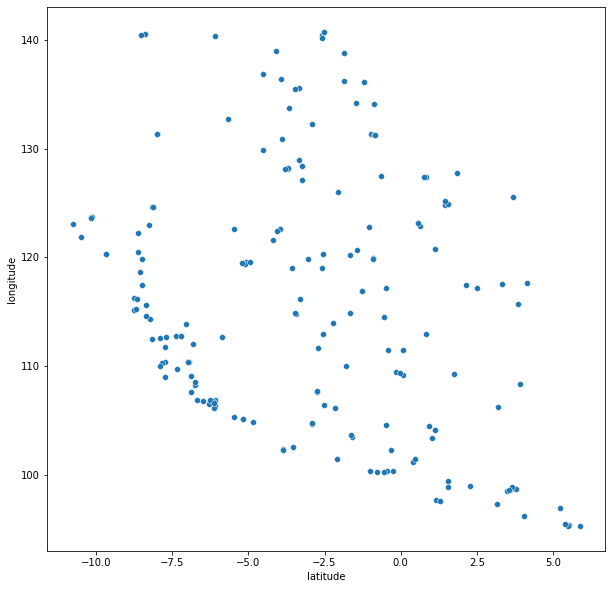

In [14]:
f,ax = plt.subplots(figsize = (10,10))

sns.scatterplot(data = cm_sd, x = 'latitude',y = 'longitude')

In [15]:
cm_re[(cm_re['date'] == '2010-01-04')]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3899,2010-01-04,23.0,30.0,26.2,86.0,14.0,2.0,3.0,315.0,2.0,NW,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
7898,2010-01-04,24.0,31.2,26.8,88.0,NaN,1.1,6.0,135.0,2.0,S,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1
11610,2010-01-04,20.7,30.0,25.9,88.0,0.0,0.1,3.0,0.0,0.0,SW,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,Kab. Nagan Raya,4.04928,96.24796,15,1
15610,2010-01-04,24.0,31.2,26.9,88.0,12.0,1.3,3.0,360.0,4.0,SE,96017,Stasiun Klimatologi Aceh,Kab. Aceh Besar,5.40400,95.46400,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571818,2010-01-04,23.0,33.8,27.2,88.0,21.6,4.5,13.0,90.0,6.0,N,97796,Stasiun Meteorologi Mozez Kilangin,Kab. Mimika,-4.53006,136.89348,466,32
575730,2010-01-04,27.4,31.4,29.0,79.0,1.0,5.0,8.0,315.0,5.0,NW,97810,Stasiun Meteorologi Karel Sadsuitubun,Kab. Maluku Tenggara,-5.66370,132.73620,439,30
579287,2010-01-04,24.0,33.0,26.1,92.0,25.0,0.0,3.0,0.0,2.0,NE,97876,Stasiun Meteorologi Tanah Merah,Kab. Boven Digoel,-6.10000,140.31000,473,32
582047,2010-01-04,25.0,31.0,27.9,85.0,0.0,1.2,10.0,270.0,6.0,N,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30


In [16]:
cm.dropna().head(10)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
7,2010-01-08,21.8,29.8,26.8,91.0,3.0,0.6,5.0,90.0,4.0,E,96001
8,2010-01-09,21.8,30.2,26.7,92.0,3.0,0.7,4.0,90.0,3.0,E,96001
9,2010-01-10,20.0,30.2,27.1,88.0,28.0,0.6,5.0,90.0,4.0,E,96001
10,2010-01-11,20.0,30.2,25.7,92.0,4.0,0.6,4.0,90.0,3.0,E,96001
11,2010-01-12,23.4,30.2,27.3,85.0,0.0,0.6,3.0,45.0,3.0,NE,96001
12,2010-01-13,21.8,30.2,26.9,82.0,0.0,0.2,4.0,90.0,3.0,E,96001


In [17]:
#5.87655
cm_1 = cm_re[(cm_re['latitude'] >5.0) & (cm_re['date'] == '2010-01-05')]
cm_1[~cm_1['ff_x'].isnull()]['ff_x'].mean().round(2)

5.67

In [18]:
cm.isnull().sum()

date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64

In [19]:
cm.loc[[4],[cm.loc[[4]].isnull()]]

ValueError: Buffer has wrong number of dimensions (expected 1, got 3)

In [ ]:
cm[cm['ff_x'].isnull()]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001
5,2010-01-06,21.2,30.0,26.1,93.0,11.0,0.3,NaN,NaN,NaN,NaN,96001
6,2010-01-07,21.4,29.0,25.4,96.0,2.0,0.1,NaN,NaN,NaN,NaN,96001
20,2010-01-21,20.2,30.0,25.5,92.0,0.0,0.4,NaN,NaN,NaN,NaN,96001
34,2010-02-04,21.0,30.6,26.6,88.0,0.0,0.6,NaN,NaN,NaN,NaN,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
587400,2014-12-28,26.0,33.3,28.8,NaN,6.5,0.3,NaN,NaN,NaN,NaN,97980
587401,2014-12-29,26.0,30.4,27.8,NaN,7.2,0.0,NaN,NaN,NaN,NaN,97980
587402,2014-12-30,26.0,31.4,28.3,NaN,8.5,0.0,NaN,NaN,NaN,NaN,97980
587403,2014-12-31,24.0,31.6,27.5,NaN,10.4,0.5,NaN,NaN,NaN,NaN,97980


In [8]:
cm.loc[4].reset_index()[cm.loc[4].reset_index()[4].isnull()]['index'].tolist()

['ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

In [ ]:
cm_re.head(4)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1


In [ ]:
cm_re.loc[[4],['latitude','longitude']].loc[4]['longitude']

95.33785

In [ ]:
cm_re[cm_re['latitude'] == cm_re.loc[[4],['latitude','longitude']].loc[4]['latitude']]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,2020-12-27,23.6,30.0,27.0,86.0,0.0,0.3,3.0,130.0,1.0,C,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3892,2020-12-28,NaN,30.4,26.5,86.0,11.7,8.0,3.0,80.0,0.0,C,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3893,2020-12-29,24.0,30.0,26.7,86.0,NaN,4.5,4.0,100.0,3.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3894,2020-12-30,24.6,30.0,27.0,84.0,0.0,5.0,6.0,100.0,3.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1


In [33]:
cm.loc[4].reset_index()[cm.loc[4].reset_index()[4].isnull()]['index'].tolist()

['ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

In [32]:
cm_re[(cm_re['date'] == '2010-01-05')&(cm_re['latitude'] >= 5.87655 - 0.5)&(cm_re['latitude'] <= 5.87655 + 0.5)].fillna({'RR':cm_re[(cm_re['date'] == '2010-01-05')&(cm_re['latitude'] >= 5.87655 - 0.5)&(cm_re['latitude'] <= 5.87655 + 0.5)]['RR'].mean()} )

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
7899,2010-01-05,24.0,30.6,25.5,91.0,2.0,2.8,8.0,135.0,2.0,NE,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1
15611,2010-01-05,23.0,32.6,24.7,89.0,2.0,4.8,5.0,180.0,2.0,N,96017,Stasiun Klimatologi Aceh,Kab. Aceh Besar,5.40400,95.46400,6,1


In [62]:
#원본 
for i in range(0,len(cm_re)):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= 5.87655 - 0.5)&(cm_re['latitude'] <= 5.87655 + 0.5)].fillna({j:cm_re[(cm_re['date'] == i)&(cm_re['latitude'] >= 5.87655 - 0.5)&(cm_re['latitude'] <= 5.87655 + 0.5)][j].mean()},inplace = True)

KeyboardInterrupt: 

In [18]:
# 주의사항 cm에 ddd_car컬럼 삭제, date 컬럼 문자형 변형
#완성본 (153m22.2s)
for i in range(0,len(cm_re)):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re.loc[[i]] = cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= cm_re.iloc[i]['latitude'] - 0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude'] + 0.5)].fillna({j:cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= cm_re.iloc[i]['latitude'] - 0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude'] + 0.5)][j].mean()})

In [13]:
# 10번 인덱스 까지
for i in range(0,10):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re.loc[[i]] = cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= cm_re.iloc[i]['latitude'] - 0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude'] + 0.5)].fillna({j:cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= cm_re.iloc[i]['latitude'] - 0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude'] + 0.5)][j].mean()})

In [7]:
cm = cm.drop(columns= 'ddd_car')

In [12]:
cm['date'] = cm['date'].astype(str)

In [9]:
cm_re.isnull().sum()

date                 0
Tn               23383
Tx               37736
Tavg             45105
RH_avg           48182
RR              125384
ss               43721
ff_x             10214
ddd_x            13128
ff_avg           10127
ddd_car          13739
station_id           0
station_name         0
region_name          0
latitude             0
longitude            0
region_id            0
province_id          0
dtype: int64

In [19]:
cm_re.isnull().sum()

date                0
Tn                 31
Tx                 52
Tavg               68
RH_avg             68
RR               1496
ss                103
ff_x                1
ddd_x               0
ff_avg             24
ddd_car         13739
station_id          0
station_name        0
region_name         0
latitude            0
longitude           0
region_id           0
province_id         0
dtype: int64

In [32]:
# 경도에서 평균을 잡을수 없어 위도에서 잡음 (156m1.1s)
for i in range(0,len(cm_re)):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re.loc[[i]] = cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['longitude'] >= cm_re.iloc[i]['longitude'] - 0.5)&(cm_re['longitude'] <= cm_re.iloc[i]['longitude'] + 0.5)].fillna({j:cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['longitude'] >= cm_re.iloc[i]['longitude'] - 0.5)&(cm_re['longitude'] <= cm_re.iloc[i]['longitude'] + 0.5)][j].mean()})

In [33]:
cm_re.isnull().sum()

date                0
Tn                  4
Tx                  2
Tavg                2
RH_avg              2
RR                320
ss                  9
ff_x                0
ddd_x               0
ff_avg              0
ddd_car         13739
station_id          0
station_name        0
region_name         0
latitude            0
longitude           0
region_id           0
province_id         0
dtype: int64

In [34]:
cm_re.to_csv('climate_re_re.csv')